In [1]:
import argparse
import os,sys
# sys.path.append("/home/joonha/")
# import scjp
import scanpy as sc

In [3]:
np.__version__

'1.23.5'

# Geomatricsketch를 이용한 단일 세포 RNA 시퀀싱 데이터 축소

Geomatricsketch는 큰 데이터셋의 효율적 처리를 위해 설계된 데이터 축소 기술. 이 기술은 'sketching' 방법을 사용하여 데이터의 차원을 줄이고, 특정 유전자나 표현형 특징을 중심으로 중요한 피처만을 선택하여 데이터를 필터링. 또한, 데이터의 sparsity를 이용하여 불필요한 정보를 제거하고 데이터 처리를 최적화.

## 데이터 축소 과정

데이터는 `cell_type_minor`와 `cell_type_subset` 기준으로 두 차례에 걸쳐 축소.

### cell_type_minor 기준 결과

- **원본 데이터셋**: 482,351개의 세포
- **축소 후 데이터셋**: 16,296개의 세포
- **cell_cnt_min 설정**: 최소 1,000개 세포

#### 세포 유형별 분포
| Cell Type   | Original Count | Reduced Count |
|-------------|----------------|---------------|
| T           | 199,542        | 1,900         |
| Myeloid     | 121,878        | 1,944         |
| tumor       | 51,046         | 1,940         |
| B           | 40,644         | 1,852         |
| Epi         | 37,034         | 1,923         |
| Fibroblast  | 12,278         | 1,787         |
| Mast        | 9,830          | 1,650         |
| NEC         | 6,630          | 1,717         |
| TEC         | 3,469          | 1,583         |

### cell_type_subset 기준 결과

- **원본 데이터셋**: 482,351개의 세포
- **축소 후 데이터셋**: 11,473개의 세포
- **cell_cnt_min 설정**: 최소 520개 세포

#### 세포 유형별 분포
| Cell Type            | Original Count | Reduced Count |
|----------------------|----------------|---------------|
| T                    | 199,542        | 1,160         |
| Myeloid              | 121,878        | 1,022         |
| tumor                | 51,046         | 1,016         |
| B                    | 40,644         | 961           |
| Epi                  | 37,034         | 1,004         |
| Fibroblast           | 12,278         | 947           |
| Mast                 | 9,830          | 921           |
| activated capillary  | 4,185          | 909           |
| Immature_Phenotype   | 2,235          | 829           |
| capillary type I     | 1,646          | 837           |
| capillary type II    | 799            | 697           |
| Tip_Cells            | 714            | 650           |
| Activated_EC         | 520            | 520           |

In [4]:
add = '/home/nccpml/DATA2/hanbyeol/TEC/h5ad_data/'
os.listdir(add)

['EC_markers.tsv',
 'TEC_markers.tsv',
 'NCA_Lung_filtered.h5ad',
 'NCA_Lung_gs.h5ad',
 'NCA_Lung.h5ad',
 'CCA_Lung_0417.h5ad',
 'CCA_Lung_gs_subset.h5ad',
 'CCA_Lung_tumor_reanno_0424.h5ad',
 'CCA_Lung_subset_gs_0424.h5ad',
 'CCA_Lung_reanno_0424.h5ad',
 'CCA_Lung_0416.h5ad',
 'CCA_Lung.h5ad',
 'CCA_Lung_lite.h5ad',
 'CCA_Lung_minor_gs_0424.h5ad',
 'CCA_Lung_subset_gs_0424_prepro.h5ad',
 'CCA_Lung_anno2404.h5ad',
 'CCA_Lung_gs_minor.h5ad',
 'CCA_Lung_tumor_anno.h5ad',
 'CCA_Lung_minor_gs_0424_prepro.h5ad']

## Load scRNA data from CCA

In [10]:
add = '/home/nccpml/DATA2/hanbyeol/TEC/h5ad_data/'
adata = sc.read(add+'NCA_Lung.h5ad')
adata

AnnData object with n_obs × n_vars = 12622 × 36601
    obs: 'n_counts', 'n_genes', 'mito', 'doublet_scores', 'predicted_doublets', 'Dataset', 'Anno_low', 'Anno_high', 'Organ_orig', 'Organ', 'Platform', 'Sample', 'Patient', 'Subtype', 'Tissue_site', 'Tissue', 'Meta_site', 'Treatment', 'Immunotherapy', 'Response', 'CancerType', 'CancerAbbr', 'DataOrgTis', 'PtOrgTis', 'SpOrgTis', 'OrgTis', 'leiden', 'Sample_Origin', 'Status', 'Diagnosis', 'anno_new', 'cnv_status', 'anno_final2207', 'anno_figure', 'anno_specific', 'anno_fig_specific', 'anno_2211', 'F1C', 'anno_cat', 'anno_2212'
    uns: 'CancerType_colors', 'F1C_colors', 'anno_2211_colors', 'anno_2212_colors', 'anno_fig_specific_colors', 'anno_figure_colors', 'anno_final2207_colors', 'anno_new_colors', 'anno_specific_colors', 'cnv_status_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

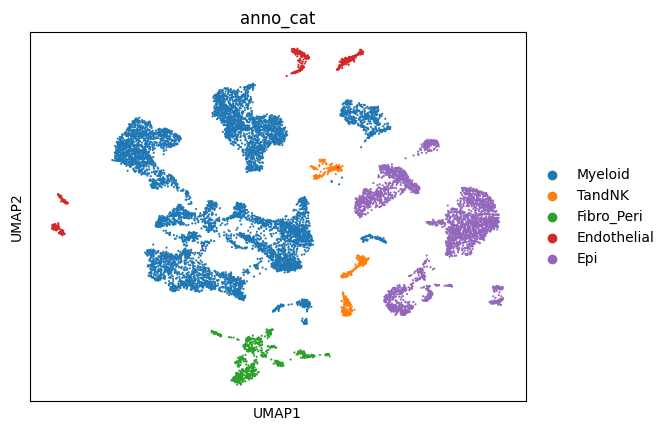

In [3]:
sc.pl.umap(adata,color=['anno_cat'])

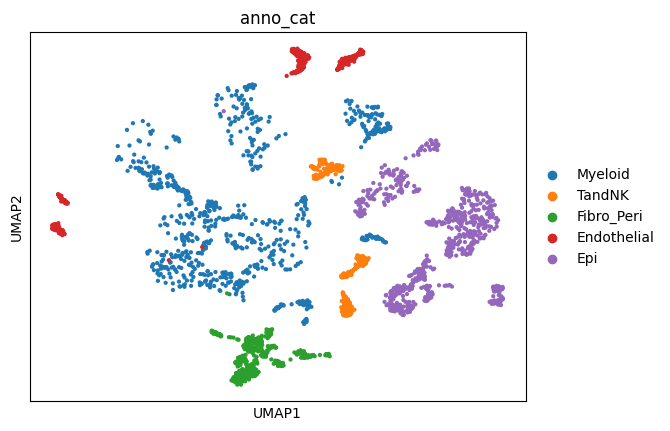

In [6]:
sc.pl.umap(adata,color=['anno_cat'])

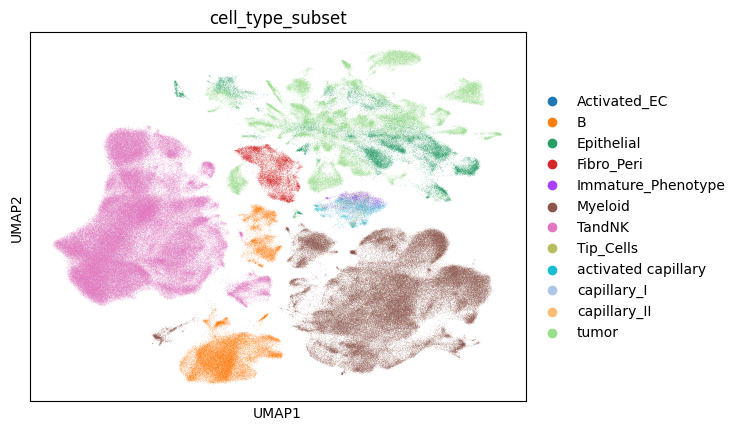

In [46]:
sc.pl.umap(adata,color=['cell_type_subset'])

In [12]:
adata.obs['anno_cat'].value_counts()

anno_cat
Myeloid        7864
Epi            3051
Fibroblast      602
TandNK          498
Endothelial     458
Pericyte        103
B                46
Name: count, dtype: int64

In [11]:
# adata_NCA의 세포 유형 비율 계산
adata_nca_counts = adata.obs['anno_cat'].value_counts()
adata_nca_percentage = (adata_nca_counts / adata_nca_counts.sum()) * 100
adata_nca_percentage.round(2)

anno_cat
Myeloid        62.30
Epi            24.17
Fibroblast      4.77
TandNK          3.95
Endothelial     3.63
Pericyte        0.82
B               0.36
Name: count, dtype: float64

In [10]:
adata.obs['cell_type_minor'].value_counts()

cell_type_minor
TandNK        198923
Myeloid       131640
tumor          59818
B              40659
Epithelial     29105
Fibro_Peri     12174
NEC             6469
TEC             3563
Name: count, dtype: int64

In [13]:
adata.obs['cell_type_subset'].value_counts()

cell_type_subset
TandNK                 198923
Myeloid                131640
tumor                   59818
B                       40659
Epithelial              29105
Fibro_Peri              12174
activated capillary      4066
Immature_Phenotype       2288
capillary_I              1619
capillary_II              784
Tip_Cells                 736
Activated_EC              539
Name: count, dtype: int64

In [12]:
rend = {'capillary type I': 'capillary_I',
        'capillary type II': 'capillary_II'}
adata.obs['cell_type_subset'].replace(rend, inplace = True)

/tmp/ipykernel_608582/994708834.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata.obs['cell_type_subset'].replace(rend, inplace = True)
/tmp/ipykernel_608582/994708834.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['cell_type_subset'].replace(rend, inplace = True)


## Geometric sketch for sub-sampling

In [26]:
adata.raw = adata

In [27]:
cell_cnt_min = 458

In [28]:
sketch_index = scjp.get_sketch(adata,'anno_cat',folds=330,how='pd',min_num_per_key=cell_cnt_min)

Myeloid
from: 7864
removing cc_genes...
to select: 458
length of sketch: 847
Fibro_Peri
from: 705
removing cc_genes...
to select: 458
length of sketch: 1460
Endothelial
from: 458
removing cc_genes...
to select: 458
length of sketch: 1918
TandNK
from: 498
removing cc_genes...
to select: 458
length of sketch: 2414
Epi
from: 3051
removing cc_genes...
to select: 458
length of sketch: 3220


In [29]:
len(sketch_index)

3220

In [30]:
adsketch = adata[sketch_index].copy()

In [31]:
adsketch.obs['anno_cat'].value_counts()

Myeloid        847
Epi            806
Fibro_Peri     613
TandNK         496
Endothelial    458
Name: anno_cat, dtype: int64

In [20]:
adsketch.obs['cell_type_subset'].value_counts()

cell_type_subset
TandNK                 1183
tumor                  1058
Myeloid                1056
Epithelial             1044
B                      1028
Fibro_Peri             1001
activated capillary     937
capillary_I             868
Immature_Phenotype      865
capillary_II            707
Tip_Cells               684
Activated_EC            539
Name: count, dtype: int64

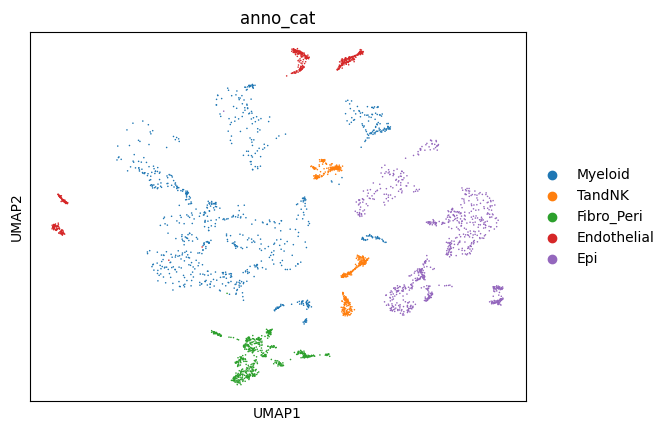

In [32]:
sc.pl.umap(adsketch,color=['anno_cat'], size=5)

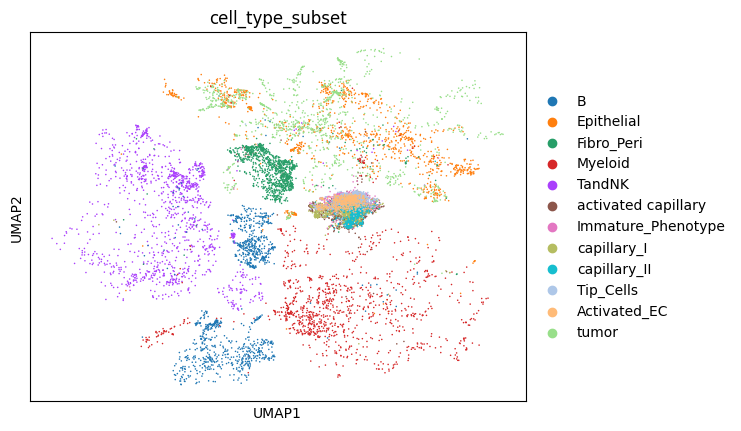

In [21]:
sc.pl.umap(adsketch,color=['cell_type_subset'], size=5)

In [33]:
path = '/home/nccpml/DATA2/hanbyeol/TEC/h5ad_data/'
file_name = 'NCA_Lung_gs.h5ad'
full_path = path+file_name
adsketch.write(full_path)